In [4]:
# unsupervised classification
##!pip install rasterio earthpy

In [6]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio
from rasterio import mask
import geopandas as gpd
from rasterio.plot import show

In [9]:
# create subset

S_sentinel_bands = glob("satData/S2B_MSIL2A_20230622T073619_N0509_R092_T37NCC_20230622T104305.SAFE/GRANULE/L2A_T37NCC_A032865_20230622T075610/IMG_DATA/R10m/*B?*.jp2")
S_sentinel_bands.sort()

#band_paths = ['path_to_band_1.tif', 'path_to_band_2.tif', ...]  # Replace with the paths to your band files

# Read band 1 to get the metadata
with rio.open(S_sentinel_bands[0]) as src:
    meta = src.meta
    transform = meta['transform']
# Read all bands as rasterio datasets
datasets = []
for path in S_sentinel_bands:
    datasets.append(rio.open(path))

# Read all bands
bands = []
for path in S_sentinel_bands:
    with rio.open(path, transform=transform) as src:
        bands.append(src.read(1))  # Read the first band (band index starts at 1 in rasterio)

In [10]:
# load mask
mask_path = 'aoi.gpkg'  # Replace with the path to your mask shapefile
mask_layer = gpd.read_file(mask_path, layer='aoi')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [11]:
mask_layer = mask_layer.to_crs(meta['crs'])

In [13]:
# Clip the bands using the vector layer mask
clipped_bands = []
for dataset in datasets:
    clipped, _ = mask.mask(dataset, mask_layer.geometry, crop=True)
    clipped_bands.append(clipped)

In [14]:
for i, clipped_band in enumerate(clipped_bands):
    meta['count'] = 1  # Set the band count to 1
    meta['dtype'] = clipped_band.dtype  # Set the data type

In [13]:
S_sentinel_bands = glob("satData/S2B_MSIL2A_20230612T073619_N0509_R092_T37NCC_20230612T101141.SAFE/GRANULE/L2A_T37NCC_A032722_20230612T075442/IMG_DATA/R10m/*B?*.jp2")
S_sentinel_bands.sort()

#S_sentinel_bands = clipped_bands

l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [14]:
# Data
arr_st = np.stack(l)
#arr_st = np.stack(clipped_bands) 

# Ground Truth
#y_data = loadmat('Sundarbands_gt.mat')['gt']

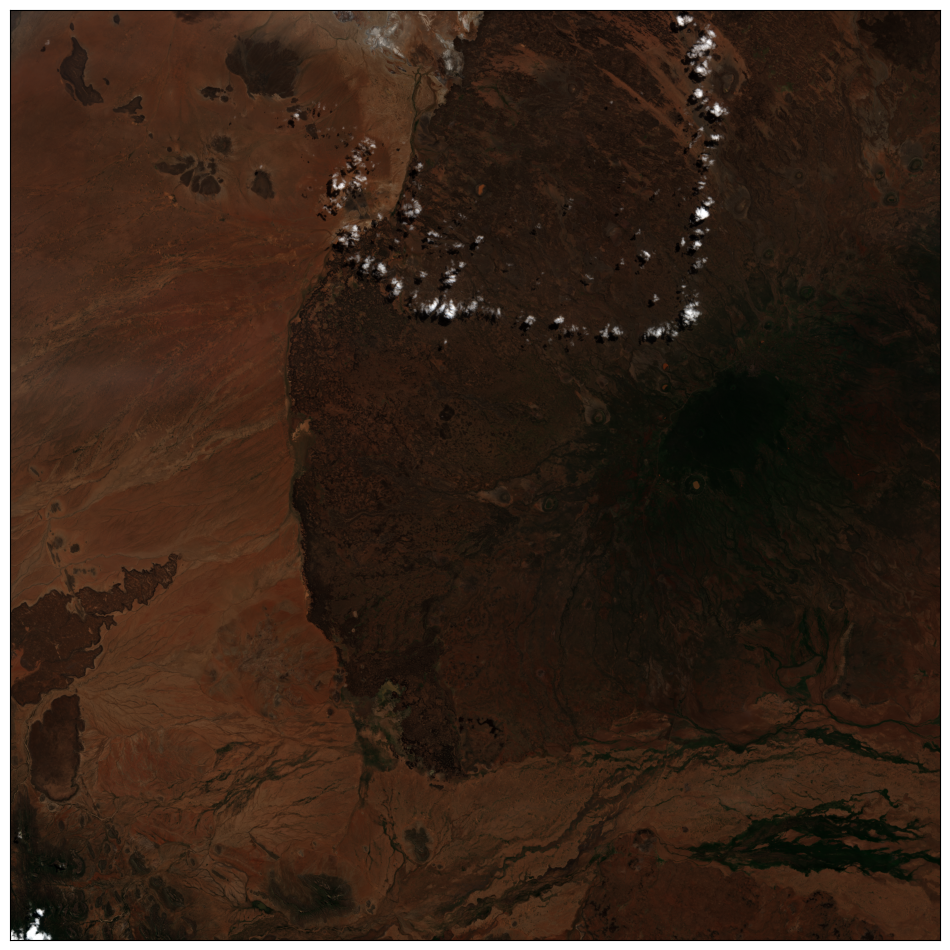

In [17]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

ep.plot_rgb(
    arr_st,
    rgb=(2, 1, 0),
    stretch=True,
    str_clip=0.02,
    figsize=(12, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

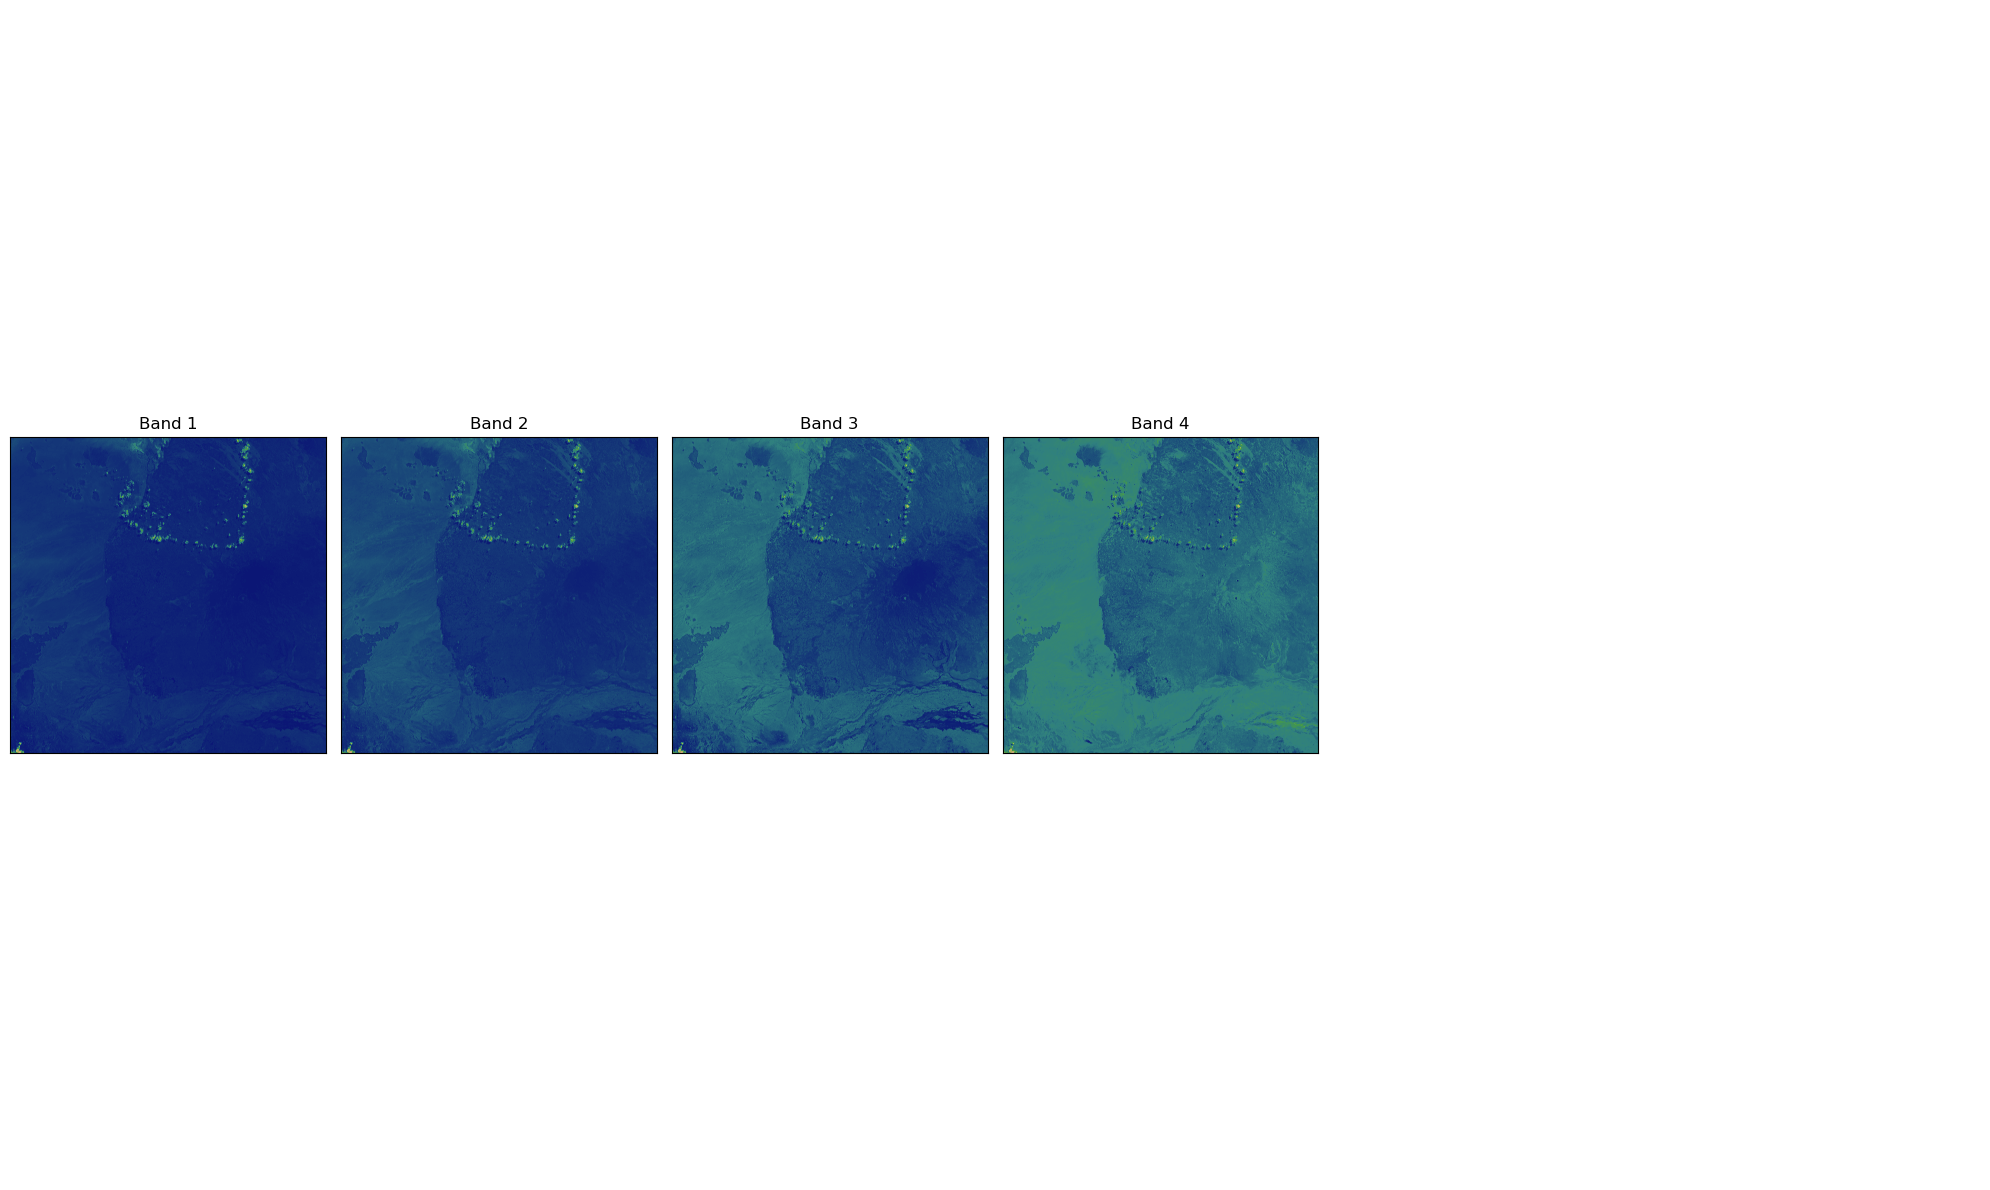

In [16]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

In [3]:
### https://www.acgeospatial.co.uk/k-means-sentinel-2-python/
### K-means in Python 3 on Sentinel 2 data
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()


In [10]:
# Read in raster image (Band 2)
img = gdal.Open('satData/S2B_MSIL2A_20230622T073619_N0509_R092_T37NCC_20230622T104305.SAFE/GRANULE/L2A_T37NCC_A032865_20230622T075610/IMG_DATA/R10m/T37NCC_20230622T073619_B02_10m.jp2', gdal.GA_ReadOnly)
img = img.ReadAsArray()

In [11]:
img.shape
X = img.reshape((-1,1))

In [33]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


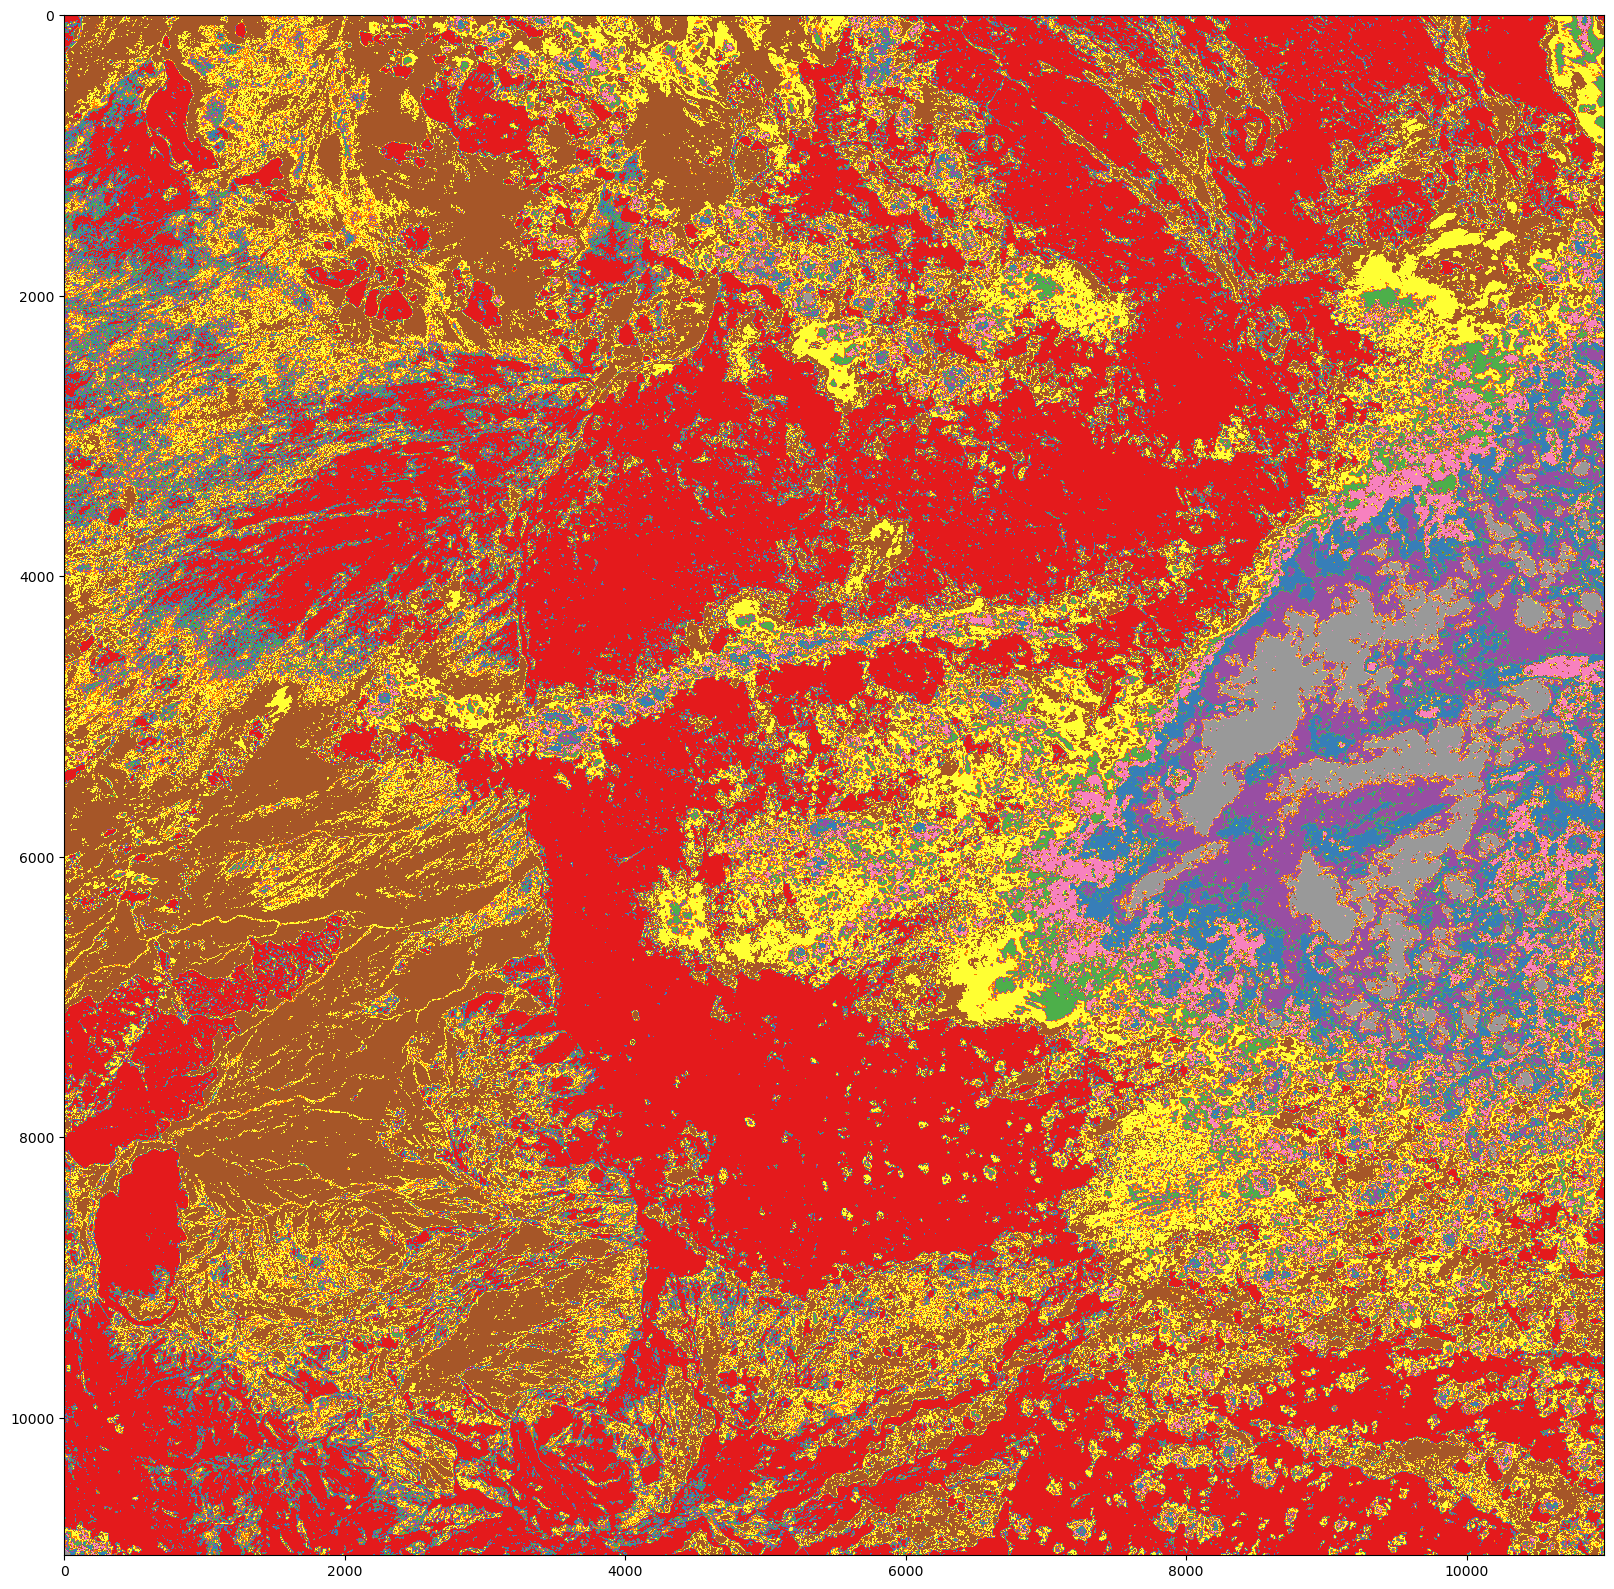

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="Set1")
plt.show()

In [ ]:
img8 = gdal.Open('satData/S2B_MSIL2A_20230622T073619_N0509_R092_T37NCC_20230622T104305.SAFE/GRANULE/L2A_T37NCC_A032865_20230622T075610/IMG_DATA/R10m/T37NCC_20230622T073619_B08_10m.jp2', gdal.GA_ReadOnly)
img8 = img8.ReadAsArray()
img8.shape
X8 = img8.reshape((-1,1))
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X8)

X8_cluster = k_means.labels_
X8_cluster = X8_cluster.reshape(img8.shape)

In [40]:
img4 = gdal.Open('satData/S2B_MSIL2A_20230622T073619_N0509_R092_T37NCC_20230622T104305.SAFE/GRANULE/L2A_T37NCC_A032865_20230622T075610/IMG_DATA/R10m/T37NCC_20230622T073619_B08_10m.jp2', gdal.GA_ReadOnly)
img4 = img4.ReadAsArray()
img4.shape
X4 = img4.reshape((-1,1))
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X4)

X4_cluster = k_means.labels_
X4_cluster = X4_cluster.reshape(img4.shape)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


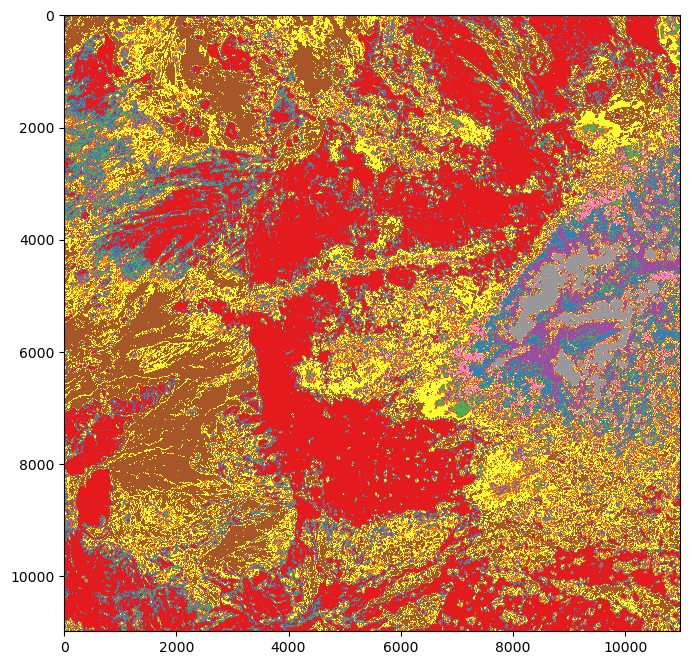

In [42]:
plt.figure(figsize=(8,8))
plt.imshow(X8_cluster, cmap="Set1")
plt.show()

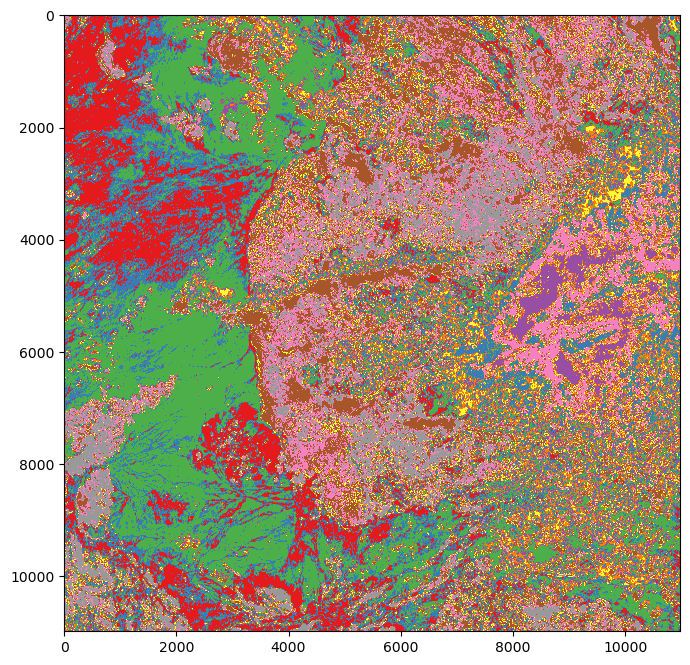

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(X4_cluster, cmap="Set1")
plt.show()

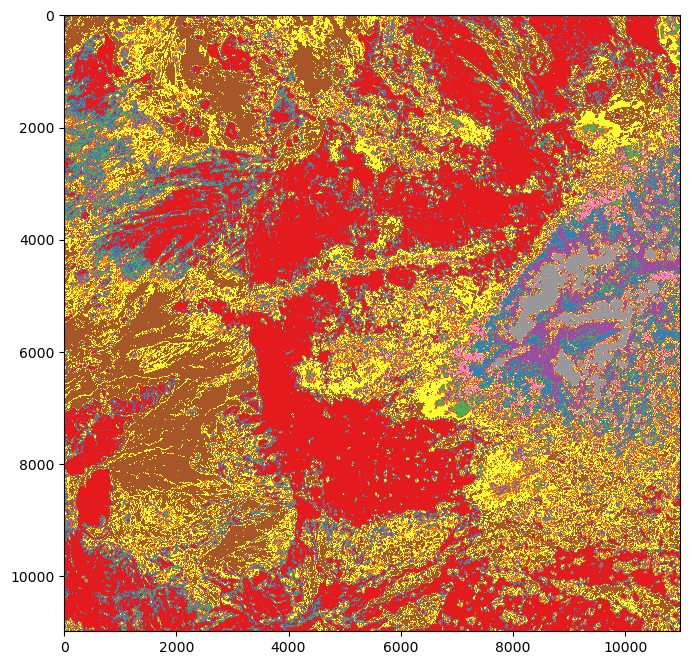

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(X_cluster, cmap="Set1")
plt.show()

In [45]:
arr_st

array([[[ 1866,  1930,  1963, ...,  1874,  1843,  1852],
        [ 1853,  1878,  1936, ...,  1916,  1860,  1814],
        [ 1826,  1830,  1902, ...,  1868,  1842,  1741],
        ...,
        [12712, 12496, 12448, ...,  2026,  2056,  2006],
        [12688, 12248, 12184, ...,  2050,  2044,  2024],
        [11584, 12144, 11968, ...,  2044,  2044,  2026]],

       [[ 2038,  2086,  2184, ...,  1890,  1858,  1855],
        [ 2026,  2034,  2144, ...,  1806,  1800,  1762],
        [ 2038,  1983,  2138, ...,  1740,  1719,  1711],
        ...,
        [12736, 12456, 12344, ...,  2482,  2470,  2454],
        [12600, 12240, 12080, ...,  2522,  2482,  2470],
        [11592, 12376, 12024, ...,  2504,  2494,  2494]],

       [[ 2290,  2382,  2568, ...,  1954,  1959,  1956],
        [ 2272,  2344,  2534, ...,  1892,  1892,  1875],
        [ 2310,  2328,  2498, ...,  1844,  1826,  1778],
        ...,
        [12712, 12504, 12384, ...,  3396,  3350,  3340],
        [12672, 12360, 12232, ...,  3420,  33

In [4]:
arr_st.shape
X_all = arr_st.reshape((-1,1))

NameError: name 'arr_st' is not defined

In [2]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X_all)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

NameError: name 'cluster' is not defined

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(X_cluster, cmap="Set1")
plt.show()

In [23]:
from sklearn.cluster import KMeans

for i in range(1, nbands+1):
    band = naip_ds.GetRasterBand(i).ReadAsArray()
    data[:, i-1] = band.flatten()


km = KMeans(n_clusters=7)
km.fit(arr_st)
km.predict(arr_st)

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
X

array([[1866],
       [1930],
       [1963],
       ...,
       [2044],
       [2044],
       [2026]], dtype=uint16)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = np.moveaxis(arr_st, 0, -1)

X_data = x.reshape(-1, 12)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(), 
                                                    test_size=0.30, stratify = y_data.ravel())
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}")

NameError: name 'y_data' is not defined

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

print(classification_report(y_test, knn_pred))

NameError: name 'X_train' is not defined